In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"D:/EPL/pl-tables-1993-2024.csv")

# Preview
print(df.head())
print(df.info())


   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points                                 notes  
0  31  36      84  → Champions League via league finish  
1  40  17      74          → UEFA Cup via league finish  
2  65  -4      72        → UEFA Cup via league finish 1  
3  46  22      71                                   NaN  
4  55   8      63                                   NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           -----------

In [3]:
# Drop the 'notes' column (not useful for prediction)
df.drop(columns=["notes"], inplace=True)

# Preview again
print(df.head())


   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points  
0  31  36      84  
1  40  17      74  
2  65  -4      72  
3  46  22      71  
4  55   8      63  


In [6]:
# Check null values
print("Null values in each column:")
print(df.isnull().sum())

# Fill nulls (numeric → 0, categorical → 'Unknown')
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(0)


Null values in each column:
season_end_year    0
team               0
position           0
played             0
won                0
drawn              0
lost               0
gf                 0
ga                 0
gd                 0
points             0
dtype: int64


In [7]:
# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


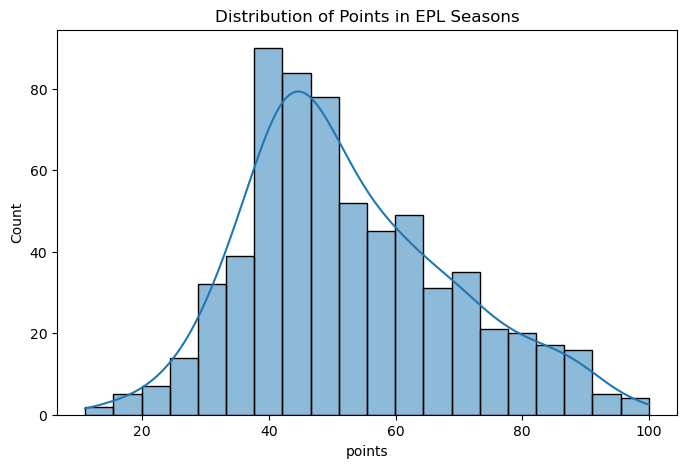

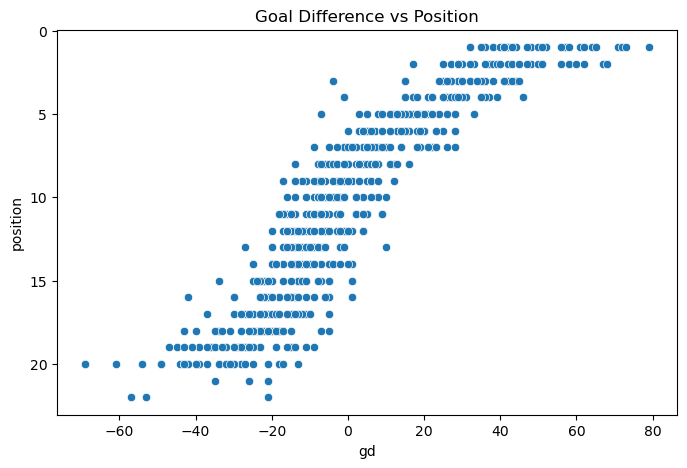

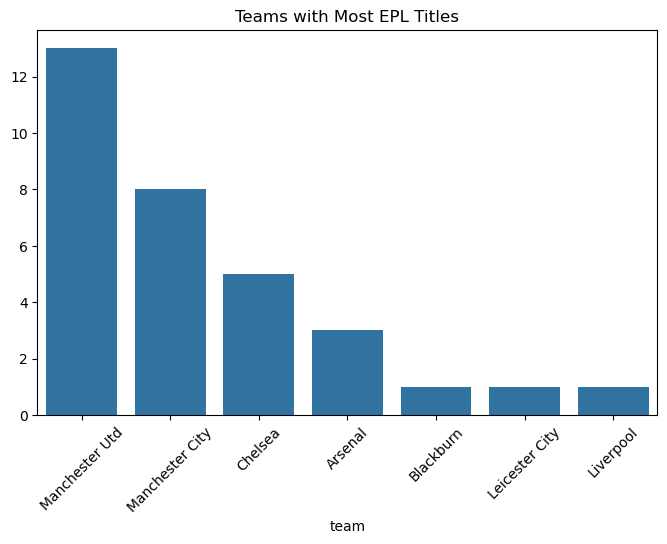

In [8]:
# Points distribution
plt.figure(figsize=(8,5))
sns.histplot(df['points'], bins=20, kde=True)
plt.title("Distribution of Points in EPL Seasons")
plt.show()

# Goal Difference vs Position
plt.figure(figsize=(8,5))
sns.scatterplot(x="gd", y="position", data=df)
plt.title("Goal Difference vs Position")
plt.gca().invert_yaxis()  # because 1st position is best
plt.show()

# Top teams with most 1st positions
winners = df[df["position"] == 1]["team"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=winners.index, y=winners.values)
plt.title("Teams with Most EPL Titles")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Outlier detection using IQR
numeric_cols = ["played", "won", "drawn", "lost", "gf", "ga", "gd", "points"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"Outliers in {col}: {outliers.shape[0]}")


Outliers in played: 66
Outliers in won: 3
Outliers in drawn: 0
Outliers in lost: 0
Outliers in gf: 13
Outliers in ga: 8
Outliers in gd: 11
Outliers in points: 4


In [10]:
# Encode categorical columns
label_cols = ["team", "season_end_year"]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Check result
print(df.head())


   season_end_year  team  position  played  won  drawn  lost  gf  ga  gd  \
0                0    28         1      42   24     12     6  67  31  36   
1                0     1         2      42   21     11    10  57  40  17   
2                0    31         3      42   21      9    12  61  65  -4   
3                0     4         4      42   20     11    11  68  46  22   
4                0    35         5      42   17     12    13  63  55   8   

   points  
0      84  
1      74  
2      72  
3      71  
4      63  
